<div style="float: right; width: 70%; height: 200px;">
  <div style="position: relative; top: 20%;padding-right:20%;">
  <div style="font-size:280%;font-weight: bold;padding-top: 20px;"> MARS</div>
  <div style="font-size:150%;font-weight: bold;padding-top: 20px;color: rgba(0 , 0 , 0 , 0.5);"> Plot Mars 1D Model</div>
  </div>
</div>


In [1]:
import os

import numpy as np
import obspy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['lines.linewidth'] = 0.5

In [2]:
## Path
pathDirExamples = os.path.join("/Users/zhangzhiyu/MyProjects/Seisflows/specfem3d_globe/EXAMPLES/")
pathDirMars1D = os.path.join(pathDirExamples, 'mars_regional')
pathDirOutput = os.path.join(pathDirMars1D, 'OUTPUT_FILES')
pathDirData = os.path.join(pathDirMars1D, 'DATA')
pathDirDataMars = os.path.join(pathDirData, 'mars')

os.chdir(pathDirOutput)

## Read Mars_1D Model 

In [ ]:
## Read Mars_1D Model 

fileMarsModel = 'mars_1D.dat'
dataMarsModel = np.loadtxt(os.path.join(pathDirDataMars, fileMarsModel))
fig = plt.figure(figsize=(4, 6))
plt.plot(dataMarsModel[:, 1], dataMarsModel[:, 0])
plt.title("vp [km/s]")

## Read .xyz File

In [ ]:
## Read .xyz File
fileXYZ = "gmt_movie_000500.Z.xyz"
pathFileXYZ = os.path.join(pathDirOutput, fileXYZ)

dataXYZ = np.loadtxt(pathFileXYZ)

plt.figure()
plt.tricontourf(dataXYZ[:, 0], dataXYZ[:, 1], dataXYZ[:, 2], cmap=cm.coolwarm)

## Read Station Data

In [ ]:
def read_three_channel_to_stream(fileE, fileN, fileZ, delta=0.13):
    """
    :type fileE: str
    :param fileE: path to station E channel
    :type delta: float
    :param delta: time dt 
    """
    traceE = obspy.core.stream.Trace()
    traceN = obspy.core.stream.Trace()
    traceZ = obspy.core.stream.Trace()
    station = obspy.core.stream.Stream(traces=[traceE, traceN, traceZ])

    read_trace_stats(traceE, fileE, delta)
    read_trace_stats(traceN, fileN, delta)
    read_trace_stats(traceZ, fileZ, delta)
    
    return station

def read_trace_stats(traceName, fileName, delta):
    """
    :type traceName: str
    :param traceName: trace E, N, Z name
    :type fileName: str
    :param fileName: path to station E, N, Z channel
    :type delta: float
    :param delta: time dt 
    """
    traceName.data = np.loadtxt(fileName)[:, 1]
    traceName.stats.starttime = obspy.core.UTCDateTime()
    traceName.delta = delta

In [ ]:
## Read Station Data
fileE = 'XB.ELYSE.MXE.sem.ascii'
fileN = 'XB.ELYSE.MXN.sem.ascii'
fileZ = 'XB.ELYSE.MXZ.sem.ascii'

pathFileE = os.path.join(pathDirOutput, fileE)
pathFileN = os.path.join(pathDirOutput, fileN)
pathFileZ = os.path.join(pathDirOutput, fileZ)

station = read_three_channel_to_stream(pathFileE, pathFileN, pathFileZ)
traceE = station[0]
traceN = station[1]
traceZ = station[2]

In [ ]:
print(traceE)
print('\n', traceE.stats)
print('\n', traceE.data)

In [ ]:
traceE.plot(color='red',
                size=(1600, 300),
                starttime=station[0].stats.starttime,
                endtime=station[0].stats.endtime)

## Plot mars 1D taup

In [ ]:
## conver_mars_1D_from_data_to_np
## 自己写的不好，不如用最后它的脚本

os.chdir(pathDirDataMars)
# fileMarsModel = 'mars_1D.dat'
# dataMarsModel = np.loadtxt(os.path.join(pathDirDataMars, fileMarsModel))
# dataMarsModel[:, 0] = dataMarsModel[0, 0] - dataMarsModel[:, 0]
#
# np.savetxt('mars.nd', dataMarsModel[:, :4], fmt='%1.2f') 

os.system('python convert_mars_1D_to_taup_format.py')

In [3]:
from obspy.taup import TauPyModel
from obspy.taup import taup_create

os.chdir(pathDirDataMars)
print("creating model mars_1D")

# creates taup model for mars file
taup_create.build_taup_model('./mars_1D.nd',output_folder='./',verbose=True)

creating model mars_1D
Building obspy.taup model for './mars_1D.nd' ...


In [4]:
taup_create.build_taup_model?

Signature: taup_create.build_taup_model(filename, output_folder=None, verbose=True)
Docstring:
Build an ObsPy model file from a "tvel" or "nd" file.

The file is loaded into a :class:`~obspy.taup.tau_model.TauModel`
instance and is then saved in ObsPy's own format, which can be loaded using
:meth:`~obspy.taup.tau_model.TauModel.from_file`. The output file will have
the same name as the input with ``'.npz'`` as file extension.

:type filename: str
:param filename: Absolute path of input file.
:type output_folder: str
:param output_folder: Directory in which the built
    :class:`~obspy.taup.tau_model.TauModel` will be stored. Defaults to
    the `taup/data` directory of the current obspy installation.
File:      /opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/obspy/taup/taup_create.py
Type:      function


In [5]:
# read in model
flattening = 0.0  # 1.0/901.0

model = TauPyModel(model="./mars_1D.npz",verbose=True,planet_flattening=flattening)

# check
model.model.validate()

radius_km = model.model.radius_of_planet
print("model radius:",radius_km,"(km)")

model radius: 3389.5 (km)


In [6]:
model??

Type:           TauPyModel
String form:    <obspy.taup.tau.TauPyModel object at 0x11242f970>
File:           /opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/obspy/taup/tau.py
Source:        
class TauPyModel(object):
    """
    Representation of a seismic model and methods for ray paths through it.
    """

    def __init__(self, model="iasp91", verbose=False, planet_flattening=0.0,
                 cache=None):
        """
        Loads an already created TauPy model.

        :param model: The model name. Either an internal TauPy model or a
            filename in the case of custom models.
        :param planet_flattening: Flattening parameter for the planet's
            ellipsoid (i.e. (a-b)/a, where a is the semimajor equatorial radius
            and b is the semiminor polar radius). A value of 0 (the default)
            gives a spherical planet. Note that this is only used to convert
            from geographical positions (source and receiver latitudes and


event:
  lat/lon = 11.59 / 163.79
  depth   =  30.0 (km)

station ELYSE: 
  lat/lon = 4.502384 / 135.623444
  epicentral distance =  28.751958530519374 (degree)

  P:  P phase arrival at 224.777 seconds
  S:  S phase arrival at 398.064 seconds



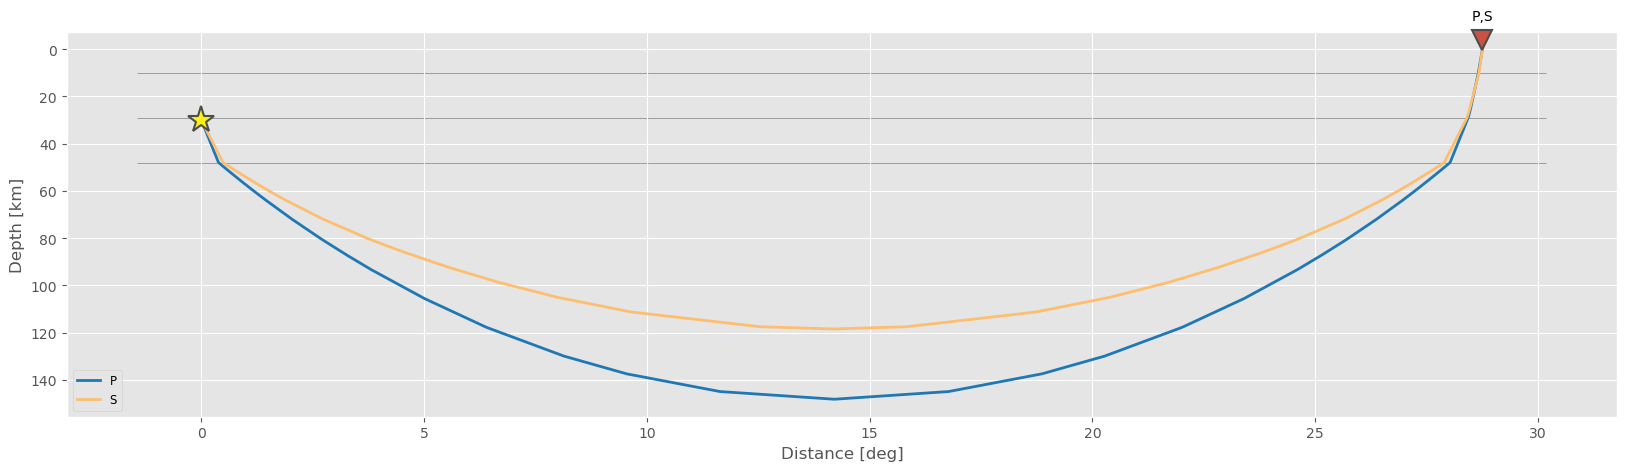

In [7]:
## epicentral distance

# event S0235b
event_lat = 11.59
event_lon = 163.79
event_dep_km = 30.0  # event depth in km

print("event:")
print("  lat/lon = {} / {}".format(event_lat,event_lon))
print("  depth   = ",event_dep_km,"(km)")
print("")

# InSight Lander station ELYSE.XB
ELYSE = { 'name': 'ELYSE', 'lat': 4.502384, 'lon': 135.623444 }   
stations = [ ELYSE ]

# epicentral distance (Haversine formula)
def get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon):
    from math import pi,sin,cos,asin,sqrt
    # converts to radians
    lat1_radians = event_lat * pi/180.0
    lon1_radians = event_lon * pi/180.0
    lat2_radians = sta_lat * pi/180.0
    lon2_radians = sta_lon * pi/180.0

    mid_lat = (lat1_radians - lat2_radians)/2.0
    mid_lon = (lon1_radians - lon2_radians)/2.0

    tmp = sqrt( pow(sin(mid_lat),2) + cos(lat1_radians)*cos(lat2_radians)*pow(sin(mid_lon),2) )

    distance_radians = 2.0 * asin(tmp)
    dist = distance_radians * 180.0/pi
    
    return dist

# show epicentral distances and main arrival times
for station in stations:    
    sta_lat = station['lat']
    sta_lon = station['lon']
    dist = get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon)
    
    print("station {}: ".format(station['name']))
    print("  lat/lon = {} / {}".format(sta_lat,sta_lon))
    print("  epicentral distance = ",dist,"(degree)")
    print("")

    # P, S arrival times (can have multiple P, S arrivals)
    arrivals_P = model.get_travel_times(source_depth_in_km=event_dep_km,
                                        distance_in_degree=dist, 
                                        phase_list=["ttall"])  # using 'ttall' in case Pn would be first, instead of P

    arrivals_S = model.get_travel_times(source_depth_in_km=event_dep_km,
                                        distance_in_degree=dist, 
                                        phase_list=["S"])
    
    # traveltimes for first arrivals    
    print("  P: ",arrivals_P[0])
    print("  S: ",arrivals_S[0])
    print("")
    
    # plot rays for first arrivals
    arrivals_P = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["ttall"])
    arrivals_S = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["S"])
    arrivals_PcP = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["PcS"])
    
    arrivals = obspy.taup.tau.Arrivals([],model=model.model)
    arrivals.append(arrivals_P[0])
    arrivals.append(arrivals_S[0])
    # arrivals.append(arrivals_PcP[0])

    ax = arrivals.plot_rays(plot_type="cartesian",label_arrivals=True,legend=True)
    

In [8]:
## arrival times
print("all arrival times:")
      
# takes InSight Lander station
station = ELYSE
sta_lat = station['lat']
sta_lon = station['lon']

# station epicentral distance in degree
dist = get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon)

print("\n  source depth: {} km, distance: {}°".format(event_dep_km,dist))

#phases = ["P","PP","PPP","PPS","p","pPcP","PKIKP","PKJKP","S","SP","SS","SSS","pP","sP","ScS","SKKS"]
phases = ["ttall"]

arrivals = model.get_travel_times(source_depth_in_km=event_dep_km,
                                  distance_in_degree=dist, 
                                  phase_list=phases)

print("\n  all possible arrivals: ",arrivals) 

all arrival times:

  source depth: 30.0 km, distance: 28.751958530519374°

  all possible arrivals:  23 arrivals
	P phase arrival at 224.777 seconds
	pP phase arrival at 236.334 seconds
	PP phase arrival at 241.648 seconds
	sP phase arrival at 242.284 seconds
	PcP phase arrival at 397.321 seconds
	S phase arrival at 398.064 seconds
	SP phase arrival at 400.858 seconds
	sS phase arrival at 418.459 seconds
	SS phase arrival at 425.632 seconds
	ScP phase arrival at 557.835 seconds
	PcS phase arrival at 563.317 seconds
	ScS phase arrival at 732.340 seconds
	PKiKP phase arrival at 880.694 seconds
	pPKiKP phase arrival at 894.500 seconds
	sPKiKP phase arrival at 899.936 seconds
	SKiKP phase arrival at 1033.479 seconds
	PKIKKIKP phase arrival at 1737.610 seconds
	SKIKKIKP phase arrival at 1891.499 seconds
	PKIKKIKS phase arrival at 1896.940 seconds
	SKIKKIKS phase arrival at 2050.553 seconds
	PKIKPPKIKP phase arrival at 2099.965 seconds
	PKPPKP phase arrival at 2277.171 seconds
	SKIKSSKIKS p

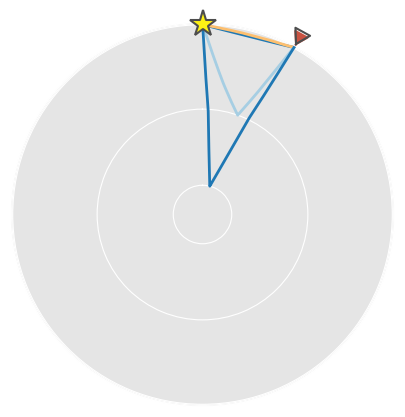

In [9]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km, 
                               distance_in_degree=dist, 
                               phase_list=['S', 'P', 'PcS', 'pPKiKP'])
ax = arrivals.plot_rays()

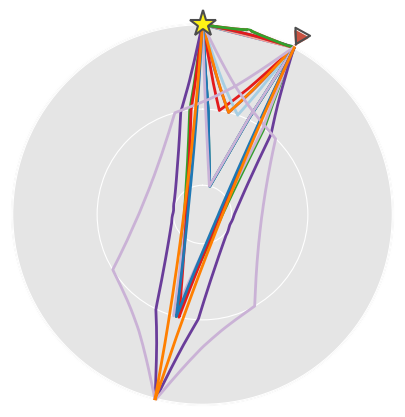

In [10]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km, 
                               distance_in_degree=dist, 
                               phase_list=phases)
ax = arrivals.plot_rays()

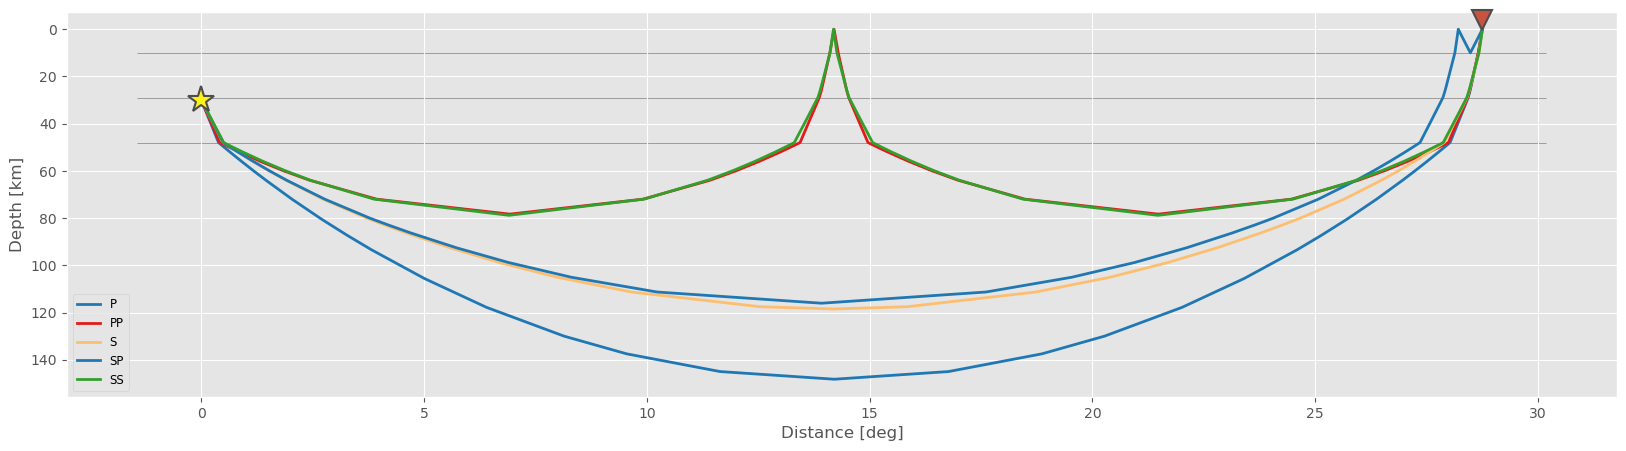

In [11]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km,
                               distance_in_degree=dist,
                               phase_list=["P","Pn","PP","S","Sn","SP","PS","SS"])  # 
ax = arrivals.plot_rays(plot_type="cartesian", legend=True)

## inSight Data 

In [3]:
pathinSightDATA = os.path.join("/Users/zhangzhiyu/MyProjects/InSight-seismic-data-downloader/DATA/")
## broadband
pathBroadband = os.path.join(pathinSightDATA, 'BROADBAND')
## low_frequency
pathLowFrequency = os.path.join(pathinSightDATA, 'LOW_FREQUENCY')

os.chdir(os.path.join(pathLowFrequency, 'A'))
os.system('exa -l')
os.chdir(os.path.join(pathLowFrequency, 'A', 'S0173a'))
print('\n')
os.system('exa -l')

drwxr-xr-x@ - zhangzhiyu 24 11 16:38 S0173a
drwxr-xr-x@ - zhangzhiyu 24 11 16:38 S0809a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S0820a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S0976a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S1022a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S1048d


.rw-r--r--@ 594k zhangzhiyu 24 11 16:38 S0173a.mseed
.rw-r--r--@ 3.9M zhangzhiyu 24 11 16:38 S0173a_ACC.mseed
.rw-r--r--@ 3.9M zhangzhiyu 24 11 16:38 S0173a_DISP.mseed
.rw-r--r--@ 3.9M zhangzhiyu 24 11 16:38 S0173a_VEL.mseed


0

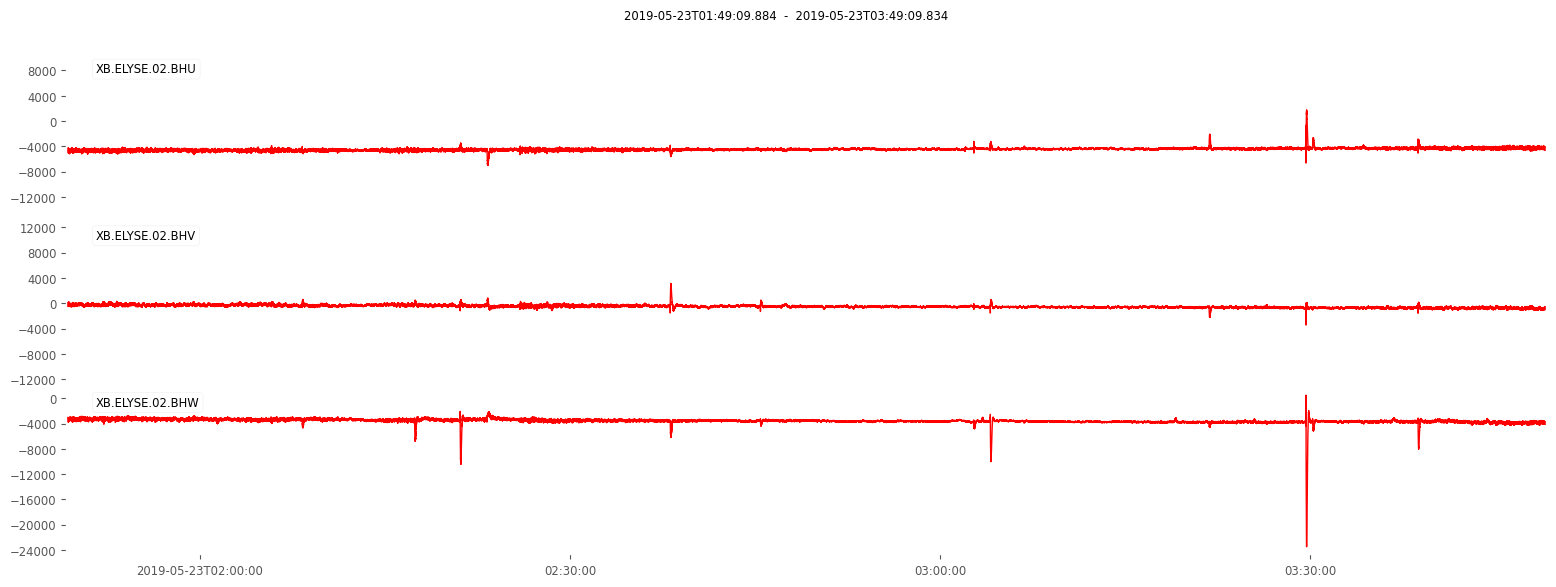

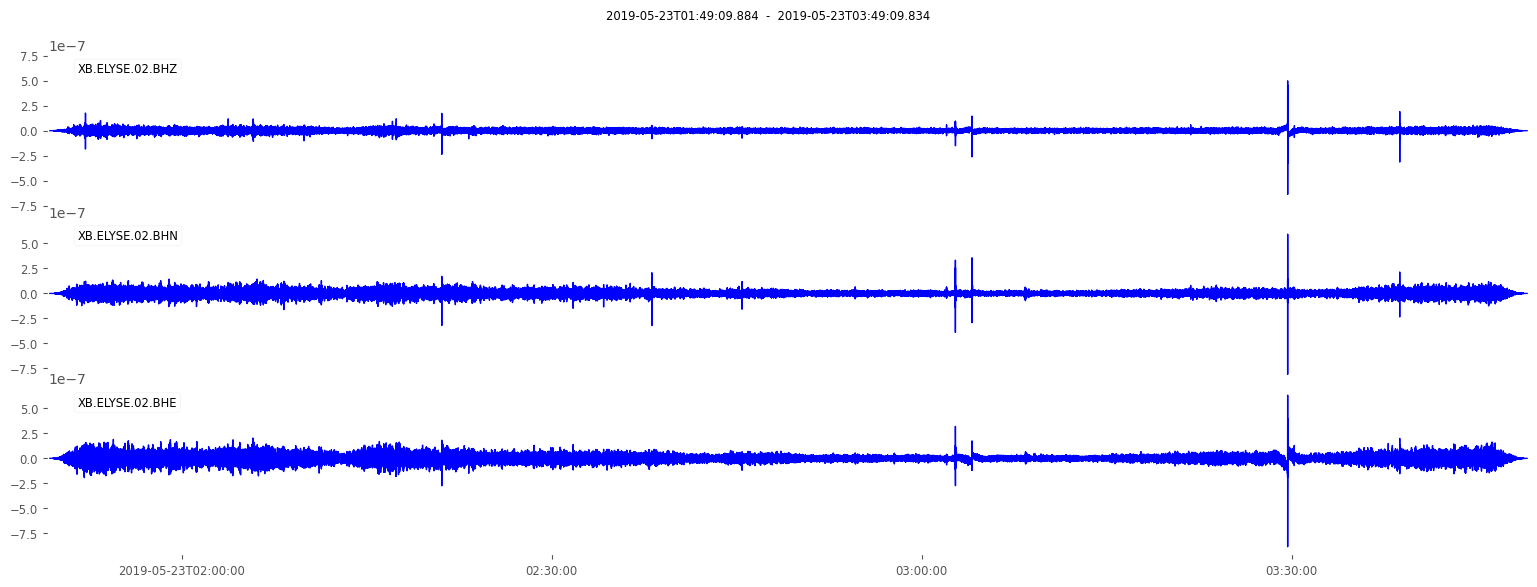

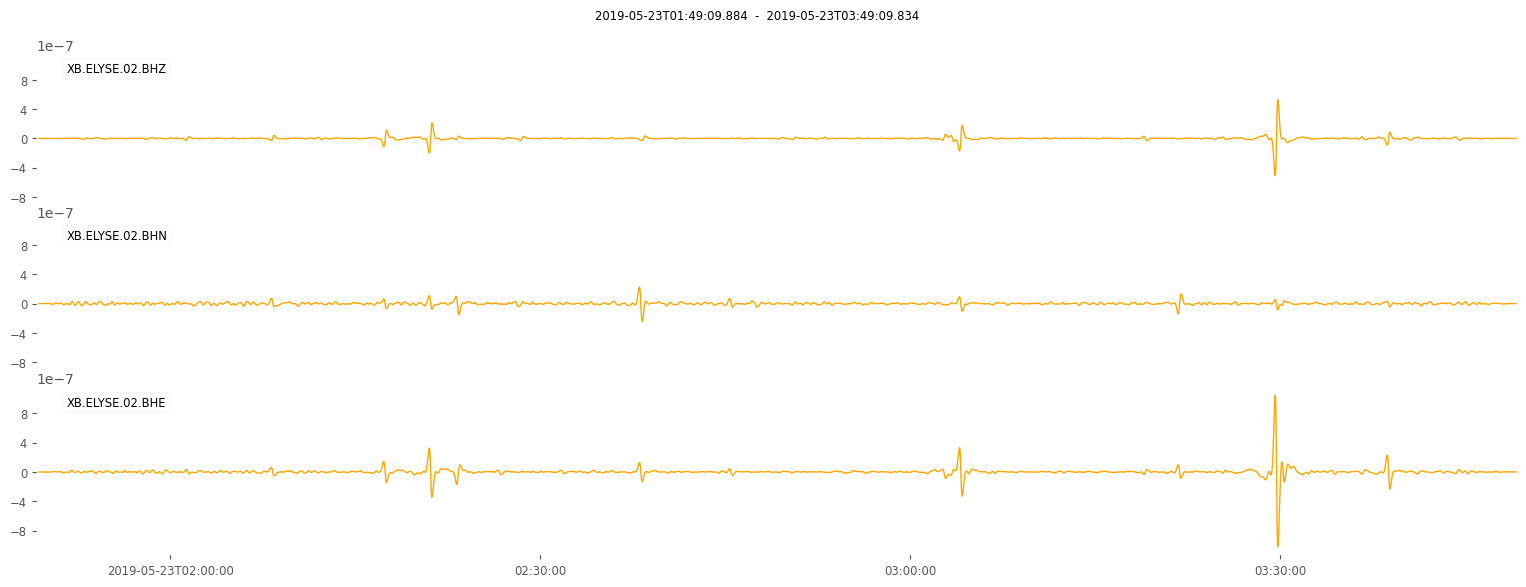

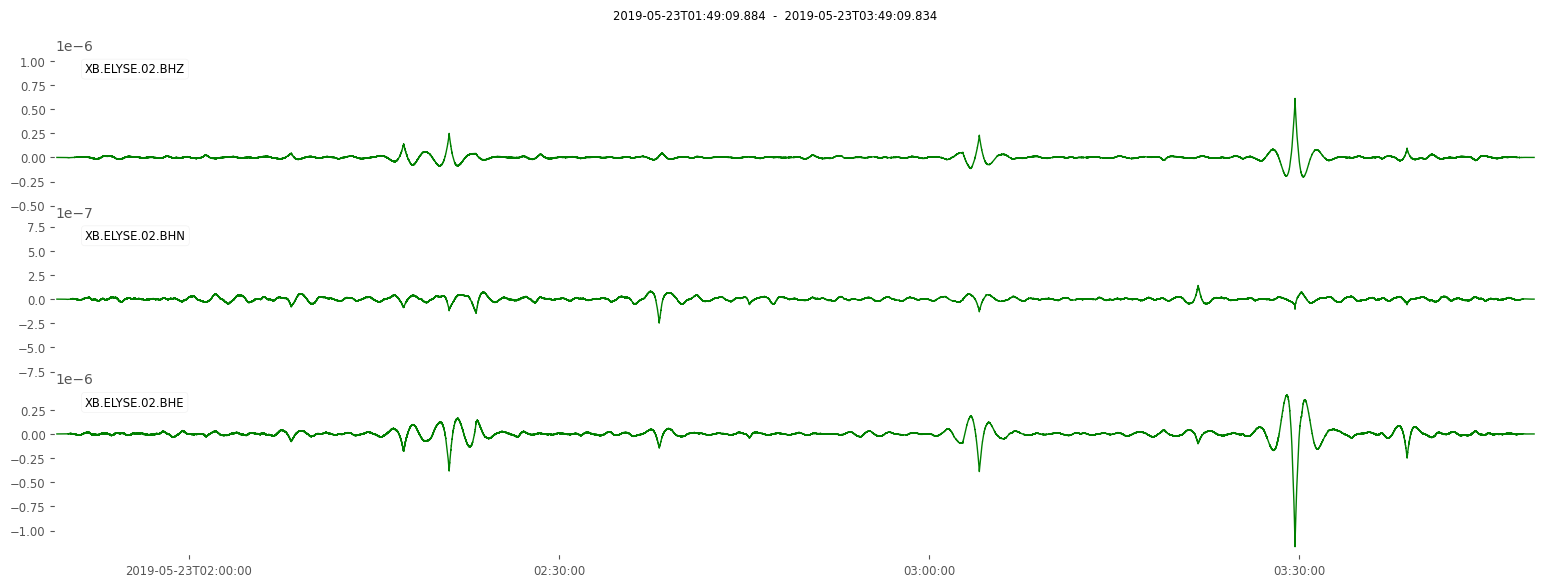

In [13]:
dataS0173a = obspy.read('S0173a.mseed')
dataS0173aACC = obspy.read('S0173a_ACC.mseed')
dataS0173aDISP = obspy.read('S0173a_DISP.mseed')
dataS0173aVel = obspy.read('S0173a_VEL.mseed')

fig = plt.figure()
fig.subplots(141)
dataS0173a.plot(color='red',
                size=(1600, 600))
fig.subplots(142)
dataS0173aACC.plot(color='blue',
                size=(1600, 600))
fig.subplots(143)
dataS0173aDISP.plot(color='orange',
                size=(1600, 600))
fig.subplots(144)
dataS0173aVel.plot(color='green',
                size=(1600, 600))
plt.show()

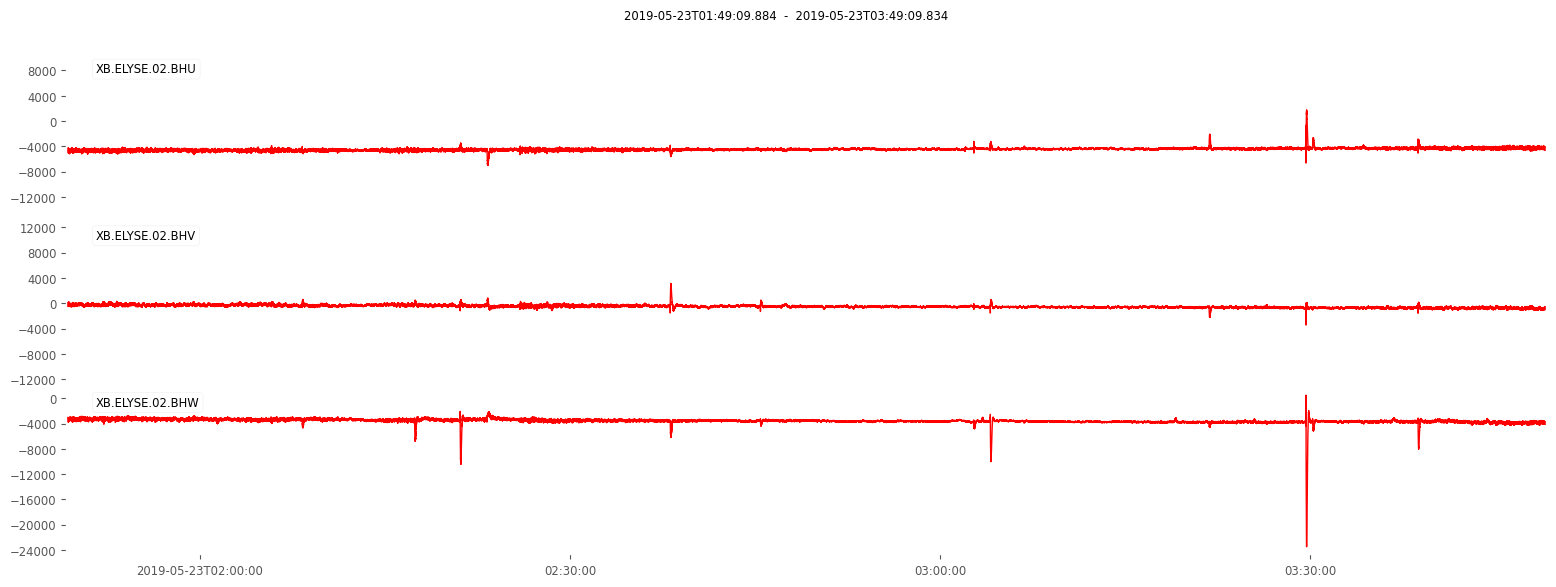

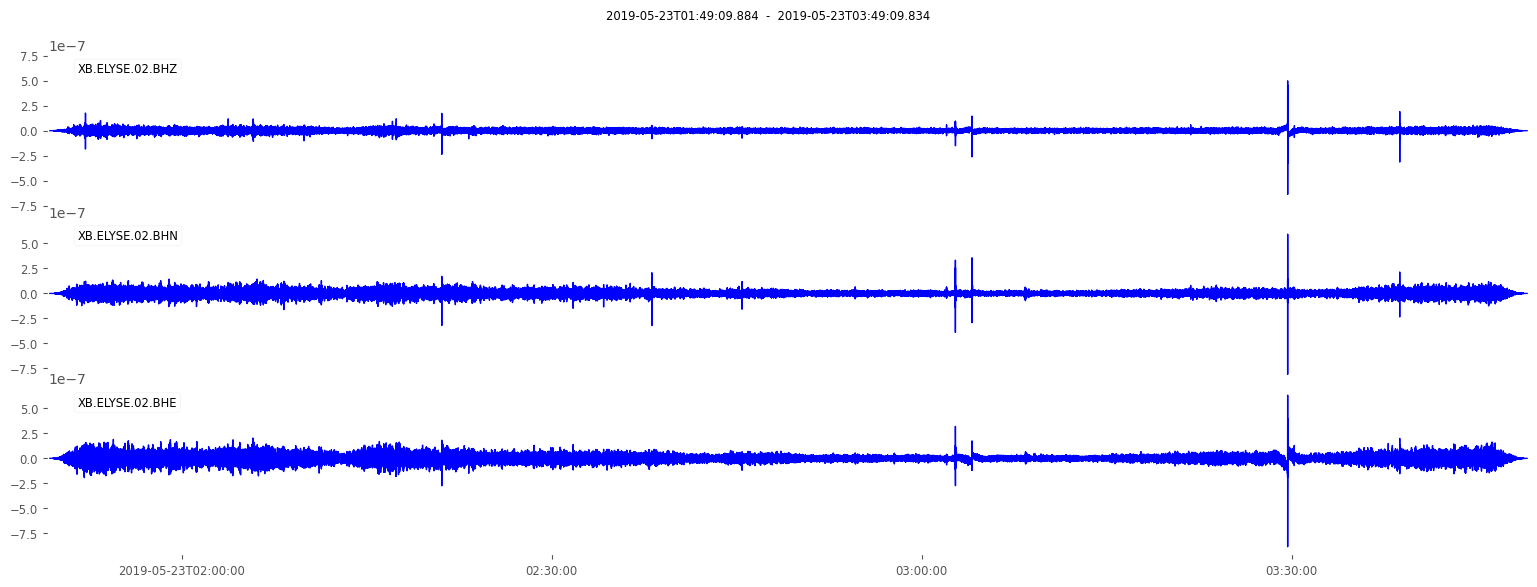

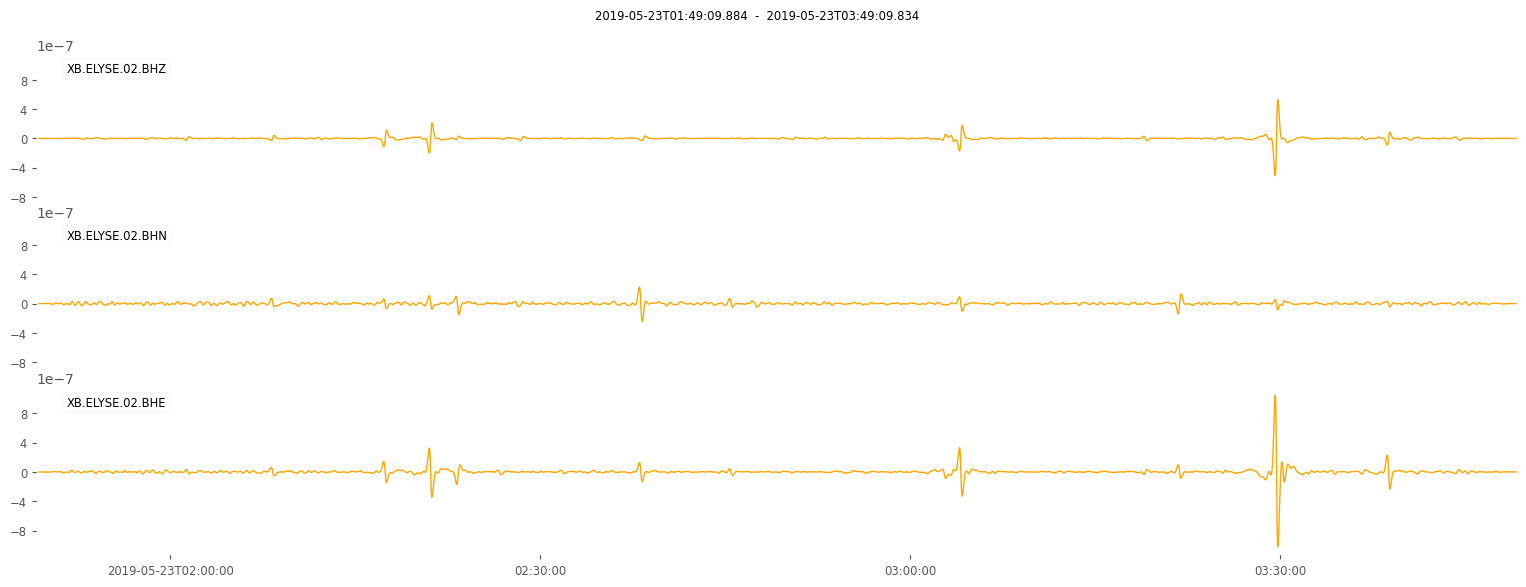

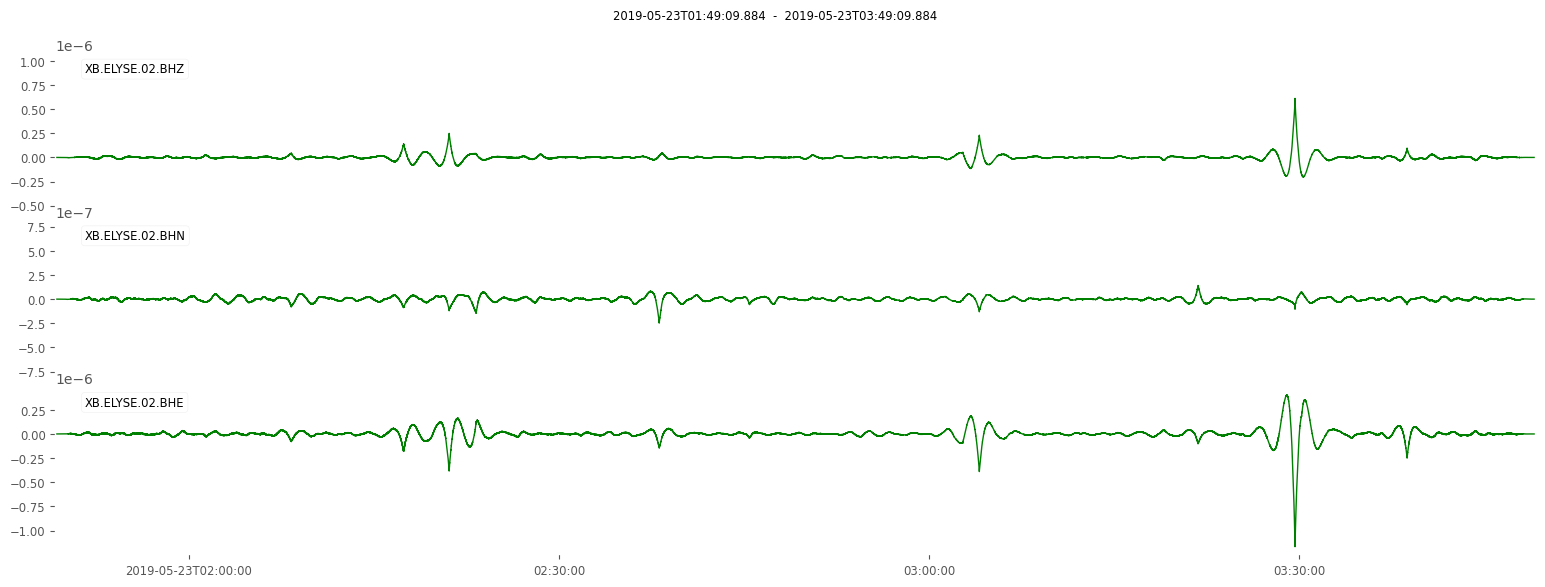

In [15]:
fig = plt.figure()
fig.subplots(141)
dataS0173a.plot(color='red',
                size=(1600, 600))
fig.subplots(142)
dataS0173aACC.plot(color='blue',
                size=(1600, 600))
fig.subplots(143)
dataS0173aDISP.plot(color='orange',
                size=(1600, 600))
fig.subplots(144)
dataS0173aVel.plot(color='green',
                size=(1600, 600),
                endtime=dataS0173aVel[0].stats.starttime + 2*60*60)
plt.show()